#Menghubungkan ke direktori Drive

In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
base_dir = '/content/drive/MyDrive/Project_CNN'

In [3]:
%cd /content/drive/MyDrive/Project_CNN

/content/drive/MyDrive/Project_CNN


In [4]:
!ls

dataset_penyakit_daun  model.h5		    testing  validation
model1.json	       my_model_weights.h5  train


In [ ]:
#!unzip \*.zip  && rm *.zip

In [5]:
#menentukan direktori
dataset_dir = os.path.join(base_dir, 'dataset_penyakit_daun')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [6]:
#melihat dataset folder dataset
diseases = os.listdir(dataset_dir)
print(diseases)

['Hawar_Daun_Jagung_Komplikasi', 'Gejala_Bercak_Daun_Jagung', 'Bulai_Daun_Jagung', 'Gejala_Hawar_Daun_Jagung', 'Daun_Jagung_Sehat']


In [7]:
Gejala_Bercak_dir = os.path.join(dataset_dir, 'Gejala_Bercak_Daun_Jagung/') 
Gejala_Hawar_dir = os.path.join(dataset_dir, 'Gejala_Hawar_Daun_Jagung/')
Bulai_Daun_dir = os.path.join(dataset_dir, 'Bulai_Daun_Jagung/')
Hawar_Daun_dir = os.path.join(dataset_dir, 'Hawar_Daun_Jagung_Komplikasi/')
Daun_Sehat_dir = os.path.join(dataset_dir, 'Daun_Jagung_Sehat/')

print("Jumlah data dataset tiap kelas")
print('Jumlah gambar Gejala Bercak Daun :', len(os.listdir(Gejala_Bercak_dir)))
print('Jumlah gambar Gejala Hawar Daun :', len(os.listdir(Gejala_Hawar_dir)))
print('Jumlah gambar Bulai Daun :', len(os.listdir(Bulai_Daun_dir)))
print('Jumlah gambar Hawar Daun :', len(os.listdir(Hawar_Daun_dir)))
print('Jumlah gambar Daun Sehat :', len(os.listdir(Daun_Sehat_dir)))


Jumlah data dataset tiap kelas
Jumlah gambar Gejala Bercak Daun : 100
Jumlah gambar Gejala Hawar Daun : 100
Jumlah gambar Bulai Daun : 57
Jumlah gambar Hawar Daun : 100
Jumlah gambar Daun Sehat : 100


In [8]:
#direktori isi training
train_gejala_bercak = os.path.join(train_dir, 'Gejala_Bercak_Daun_Jagung/')
train_gejala_hawar = os.path.join(train_dir, 'Gejala_Hawar_Daun_Jagung/')
train_bulai = os.path.join(train_dir, 'Bulai_Daun_Jagung/')
train_hawar = os.path.join(train_dir, 'Hawar_Daun_Jagung_Komplikasi/')
train_sehat = os.path.join(train_dir, 'Daun_Jagung_Sehat/')

#direktori isi validasi
validation_gejala_bercak = os.path.join(validation_dir, 'Gejala_Bercak_Daun_Jagung/')
validation_gejala_hawar = os.path.join(validation_dir, 'Gejala_Hawar_Daun_Jagung/')
validation_bulai = os.path.join(validation_dir, 'Bulai_Daun_Jagung/')
validation_hawar = os.path.join(validation_dir, 'Hawar_Daun_Jagung_Komplikasi/')
validation_sehat = os.path.join(validation_dir, 'Daun_Jagung_Sehat/')


#Mempersiapkan Library

In [9]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
from shutil import copyfile
import os                       #for working with files
import numpy as np              #for numerical computationss
import pandas as pd             #for working with dataframes
import torch                    #Pytorch module 
import matplotlib.pyplot as plt #for plotting informations on graph and images using tensors
import torch.nn as nn           #for creating  neural networks
from torch.utils.data import DataLoader      #for dataloaders 
from PIL import Image                        #for checking images
import torch.nn.functional as F              #for functions for calculating loss
import torchvision.transforms as transforms  #for transforming images into tensors 
from torchvision.utils import make_grid      #for data checking
from torchsummary import summary             #for getting the summary of our model

%matplotlib inline

#Preprocessing Data

In [ ]:
def train_val_split(source,train,val,train_ratio):
  total_size = len(os.listdir(source))
  train_size = int(train_ratio * total_size)
  val_size = total_size - train_size

  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  val_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)

  for i in val_files:
    i_file = source + i
    destination = val + i
    copyfile(i_file, destination)

train_ratio = 0.8

source_00 = Gejala_Bercak_dir
train_00 = train_gejala_bercak
val_00 = validation_gejala_bercak
train_val_split(source_00, train_00, val_00, train_ratio)

source_01 = Gejala_Hawar_dir
train_01 = train_gejala_hawar
val_01 = validation_gejala_hawar
train_val_split(source_01, train_01, val_01, train_ratio)

source_02 = Bulai_Daun_dir
train_02 = train_bulai
val_02 = validation_bulai
train_val_split(source_02, train_02, val_02, train_ratio)

source_03 = Hawar_Daun_dir
train_03 = train_hawar
val_03 = validation_hawar
train_val_split(source_03, train_03, val_03, train_ratio)

source_04 = Daun_Sehat_dir
train_04 = train_sehat
val_04 = validation_sehat
train_val_split(source_04, train_04, val_04, train_ratio)


In [10]:
print('Jumlah seluruh bercak daun :', len(os.listdir(Gejala_Bercak_dir)))
print('Jumlah train bercak daun :', len(os.listdir(train_gejala_bercak)))
print('Jumlah val bercak daun :', len(os.listdir(validation_gejala_bercak)))

Jumlah seluruh bercak daun : 100
Jumlah train bercak daun : 80
Jumlah val bercak daun : 20


In [11]:
print('Jumlah seluruh hawar daun :', len(os.listdir(Gejala_Hawar_dir)))
print('Jumlah train hawar daun :', len(os.listdir(train_gejala_hawar)))
print('Jumlah val hawar daun :', len(os.listdir(validation_gejala_hawar)))

Jumlah seluruh hawar daun : 100
Jumlah train hawar daun : 80
Jumlah val hawar daun : 20


In [12]:
print('Jumlah seluruh bulai daun :', len(os.listdir(Bulai_Daun_dir)))
print('Jumlah train bulai daun :', len(os.listdir(train_bulai)))
print('Jumlah val bulai daun :', len(os.listdir(validation_bulai)))

Jumlah seluruh bulai daun : 57
Jumlah train bulai daun : 45
Jumlah val bulai daun : 12


In [13]:
print('Jumlah seluruh hawar daun komplikasi :', len(os.listdir(Hawar_Daun_dir)))
print('Jumlah train hawar daun komplikasi :', len(os.listdir(train_hawar)))
print('Jumlah val hawar daun komplikasi :', len(os.listdir(validation_hawar)))

Jumlah seluruh hawar daun komplikasi : 100
Jumlah train hawar daun komplikasi : 80
Jumlah val hawar daun komplikasi : 20


In [14]:
print('Jumlah seluruh daun sehat :', len(os.listdir(Daun_Sehat_dir)))
print('Jumlah train daun sehat :', len(os.listdir(train_sehat)))
print('Jumlah val daun sehat :', len(os.listdir(validation_sehat)))

Jumlah seluruh daun sehat : 100
Jumlah train daun sehat : 80
Jumlah val daun sehat : 20


In [15]:
train_datagen = ImageDataGenerator(
                  rescale = 1./255,
                  rotation_range = 30,
                  horizontal_flip = True,
                  shear_range = 0.3,
                  zoom_range = 0.1
)

valid_datagen = ImageDataGenerator(
                  rescale = 1./255,
                  rotation_range = 30,
                  horizontal_flip = True,
                  shear_range = 0.3,
                  zoom_range = 0.1
)

test_datagen = ImageDataGenerator(
                  rescale = 1./255
)

In [38]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'categorical'
)

val_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'categorical'
)

labels = (train_generator.class_indices)
print(labels)

Found 365 images belonging to 5 classes.
Found 92 images belonging to 5 classes.
{'Bulai_Daun_Jagung': 0, 'Daun_Jagung_Sehat': 1, 'Gejala_Bercak_Daun_Jagung': 2, 'Gejala_Hawar_Daun_Jagung': 3, 'Hawar_Daun_Jagung_Komplikasi': 4}


In [39]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.99):
      print('\nAkurasi mencapai 99%')
      self.model.stop_training = True

callbacks = myCallback()

In [40]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation = 'relu'),
    tf.keras.layers.Dense(5, activation = 'softmax')

])

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 64)      

In [42]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

In [47]:
history = model.fit(
    train_generator,
    steps_per_epoch = 14,
    epochs = 30,
    validation_data = val_generator,
    validation_steps = 1,
    verbose = 1,
    callbacks = [callbacks]
)

Epoch 1/30
14/14 [==============================] - 3s 202ms/step - loss: 0.0564 - accuracy: 0.9849 - val_loss: 0.5100 - val_accuracy: 0.8000
Epoch 2/30
14/14 [==============================] - 3s 180ms/step - loss: 0.0642 - accuracy: 0.9811 - val_loss: 0.6287 - val_accuracy: 0.8000
Epoch 3/30
14/14 [==============================] - 3s 188ms/step - loss: 0.1057 - accuracy: 0.9607 - val_loss: 1.0782 - val_accuracy: 0.7000
Epoch 4/30
14/14 [==============================] - 3s 190ms/step - loss: 0.0875 - accuracy: 0.9714 - val_loss: 0.5690 - val_accuracy: 0.8000
Epoch 5/30
14/14 [==============================] - 3s 179ms/step - loss: 0.0488 - accuracy: 0.9887 - val_loss: 0.4793 - val_accuracy: 0.8000
Epoch 6/30
14/14 [==============================] - 3s 190ms/step - loss: 0.0828 - accuracy: 0.9714 - val_loss: 0.6918 - val_accuracy: 0.8000
Epoch 7/30
14/14 [==============================] - 3s 190ms/step - loss: 0.1664 - accuracy: 0.9396 - val_loss: 1.0279 - val_accuracy: 0.7000
Epoch 

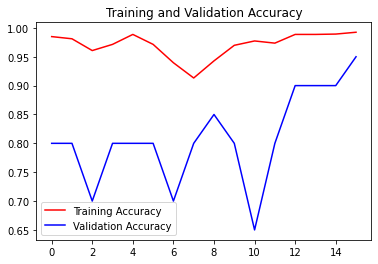

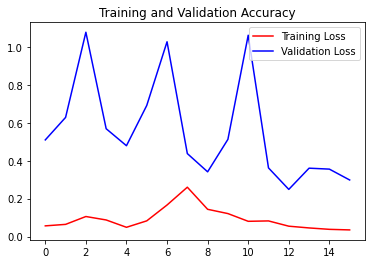

In [48]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Accuracy')
plt.legend(loc = 'best')
plt.show()

In [49]:
model_json=model.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model_json)

In [50]:
# serialize weights to HDF5
model.save_weights("my_model_weights.h5")
model.save("model.h5")
   
print("Saved model to disk")

Saved model to disk
